<a href="https://colab.research.google.com/github/LucasGCRamos/PISI3_grupo04_2024.2/blob/main/notebook/Clusteriza%C3%A7%C3%A3o_Lucas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.cm as cm
from sklearn.metrics import silhouette_samples
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%matplotlib inline

In [35]:
import pandas as pd

df = pd.read_parquet('/content/predict_dropout.parquet')
print(df.head())

   Marital status  Application mode  Application order  Course  \
0               1                17                  5     171   
1               1                15                  1    9254   
2               1                 1                  5    9070   
3               1                17                  2    9773   
4               2                39                  1    8014   

   Daytime/evening attendance\t  Previous qualification  \
0                             1                       1   
1                             1                       1   
2                             1                       1   
3                             1                       1   
4                             0                       1   

   Previous qualification (grade)  Nacionality  Mother's qualification  \
0                           122.0            1                      19   
1                           160.0            1                       1   
2                         

In [36]:
min_age = df['Age at enrollment'].min()
df['Age Group'] = (df['Age at enrollment'] - min_age) // 10

# Display the first few rows to show the new 'Age Group' column
print(df[['Age at enrollment', 'Age Group']].head())

   Age at enrollment  Age Group
0                 20          0
1                 19          0
2                 19          0
3                 20          0
4                 45          2


In [37]:
marital_percentage =df['Marital status'].value_counts(normalize=True) * 100

# Identify categories with less than 2% representation
low_percentage_categories = marital_percentage[marital_percentage < 2].index

# Group low percentage categories into a single category named 'Other'
df['Marital status'] = df['Marital status'].replace(low_percentage_categories, 3)

# Print the updated marital status distribution
print(df['Marital status'].value_counts(normalize=True) * 100)

Marital status
1    88.584991
2     8.566908
4     2.056962
3     0.791139
Name: proportion, dtype: float64


In [38]:
frequencias = df["Mother\'s qualification"].value_counts(normalize=True) * 100

# Passo 2: Identificar as categorias com valores abaixo de 1% e substituir por 0
categorias_outros = frequencias[frequencias < 1].index
df["Mother\'s qualification"] = df["Mother\'s qualification"].replace(categorias_outros, 0)

# Passo 3: Verificar o resultado
print(df["Mother\'s qualification"].value_counts())

Mother's qualification
1     1069
37    1009
19     953
38     562
3      438
0      131
34     130
2       83
4       49
Name: count, dtype: int64


In [39]:
frequencias = df["Father\'s qualification"].value_counts(normalize=True) * 100

# Passo 2: Identificar as categorias com valores abaixo de 1% e substituir por 0
categorias_outros = frequencias[frequencias < 1].index
df["Father\'s qualification"] = df["Father\'s qualification"].replace(categorias_outros, 0)

# Passo 3: Verificar o resultado
print(df["Father\'s qualification"].value_counts())

Father's qualification
37    1209
19     968
1      904
38     702
3      282
0      179
34     112
2       68
Name: count, dtype: int64


In [40]:
# Create a MinMaxScaler object
scaler = MinMaxScaler()

# Select the columns to normalize
columns_to_normalize = ['GDP', 'Inflation rate', 'Unemployment rate']

# Fit the scaler to the data and transform the selected columns
df[columns_to_normalize] = scaler.fit_transform(df[columns_to_normalize])

# Display the first few rows to show the normalized columns
print(df[columns_to_normalize].head())

        GDP  Inflation rate  Unemployment rate
0  0.766182        0.488889           0.372093
1  0.640687        0.111111           0.732558
2  0.766182        0.488889           0.372093
3  0.124174        0.000000           0.209302
4  0.640687        0.111111           0.732558


In [41]:
df_editado = df.copy()


In [42]:
columns_to_encode = ['Marital status', 'Age Group', 'Father\'s qualification', 'Mother\'s qualification', 'Debtor', 'Scholarship holder']
df_editado = pd.get_dummies(df_editado, columns=columns_to_encode)
df_editado = df_editado[ [col for col in df_editado.columns if any(substring in col for substring in columns_to_encode)] ]
print (df_editado.head())

   Marital status_1  Marital status_2  Marital status_3  Marital status_4  \
0              True             False             False             False   
1              True             False             False             False   
2              True             False             False             False   
3              True             False             False             False   
4             False              True             False             False   

   Age Group_0  Age Group_1  Age Group_2  Age Group_3  Age Group_4  \
0         True        False        False        False        False   
1         True        False        False        False        False   
2         True        False        False        False        False   
3         True        False        False        False        False   
4        False        False         True        False        False   

   Age Group_5  ...  Mother's qualification_3  Mother's qualification_4  \
0        False  ...                     F

In [43]:
for col in df_editado.columns:
    if col.startswith(('Marital status_', 'Age Group_', "Father's qualification_", "Mother's qualification_", 'Debtor_', 'Scholarship holder_')):
        df_editado[col] = df_editado[col].astype(int)

print(df_editado.head())



   Marital status_1  Marital status_2  Marital status_3  Marital status_4  \
0                 1                 0                 0                 0   
1                 1                 0                 0                 0   
2                 1                 0                 0                 0   
3                 1                 0                 0                 0   
4                 0                 1                 0                 0   

   Age Group_0  Age Group_1  Age Group_2  Age Group_3  Age Group_4  \
0            1            0            0            0            0   
1            1            0            0            0            0   
2            1            0            0            0            0   
3            1            0            0            0            0   
4            0            0            1            0            0   

   Age Group_5  ...  Mother's qualification_3  Mother's qualification_4  \
0            0  ...                      

In [44]:
df_editado['GDP'] = df['GDP']
df_editado['Inflation rate'] = df['Inflation rate']
df_editado['Unemployment rate'] = df['Unemployment rate']

print(df_editado.head())

   Marital status_1  Marital status_2  Marital status_3  Marital status_4  \
0                 1                 0                 0                 0   
1                 1                 0                 0                 0   
2                 1                 0                 0                 0   
3                 1                 0                 0                 0   
4                 0                 1                 0                 0   

   Age Group_0  Age Group_1  Age Group_2  Age Group_3  Age Group_4  \
0            1            0            0            0            0   
1            1            0            0            0            0   
2            1            0            0            0            0   
3            1            0            0            0            0   
4            0            0            1            0            0   

   Age Group_5  ...  Mother's qualification_34  Mother's qualification_37  \
0            0  ...                    

In [45]:
pca = PCA(n_components=2) # You can adjust the number of components
df_pca = pca.fit_transform(df_editado) # Exclude the target variable

# Create a new DataFrame with the PCA components and target variable
df_pca = pd.DataFrame(data = df_pca, columns = ['PC1', 'PC2'])

# Display the first few rows of the PCA DataFrame
print(df_pca)

           PC1       PC2
0     0.234840 -0.356620
1     0.354784 -0.602929
2    -0.658715  0.206182
3    -0.252607  0.033500
4    -1.286436  0.098472
...        ...       ...
4419  0.455988 -0.721846
4420  0.385399 -0.844143
4421 -0.829117  1.416930
4422 -0.155474  1.411463
4423 -0.254963  0.036242

[4424 rows x 2 columns]


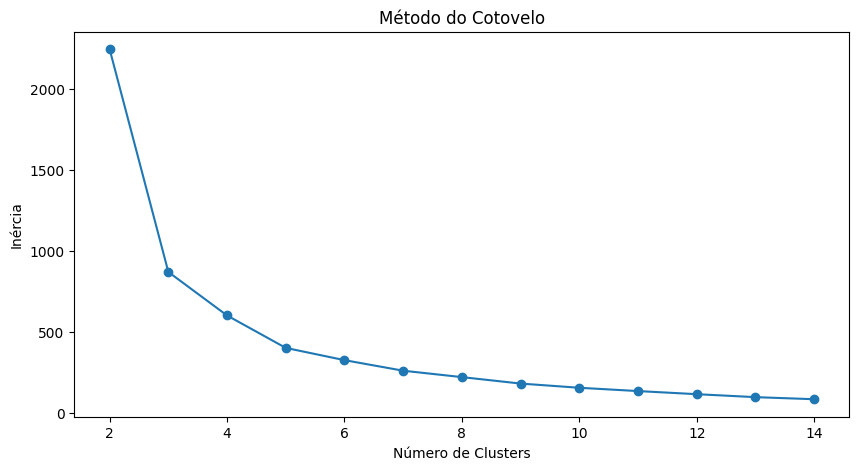

In [46]:
def calculate_metrics(df_pca, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
    kmeans.fit(df_pca)
    inertia = kmeans.inertia_
    silhouette_avg = silhouette_score(df_pca, kmeans.labels_)
    return inertia, silhouette_avg

inertia_list = []
silhouette_list = []
k_range = range(2, 15)

for k in k_range:
    inertia, silhouette = calculate_metrics(df_pca, k)
    inertia_list.append(inertia)
    silhouette_list.append(silhouette)

# Plot inertia
plt.figure(figsize=(10, 5))
plt.plot(k_range, inertia_list, marker='o')
plt.title('Método do Cotovelo')
plt.xlabel('Número de Clusters')
plt.ylabel('Inércia')
plt.show()

In [47]:
kmeans_aprovados = KMeans(n_clusters=3, random_state=42, n_init=10)
kmeans_aprovados.fit(df_pca)
silhouette_aprovados = silhouette_score(df_pca, kmeans_aprovados.labels_)
print(f"Silhouette Score: {silhouette_aprovados}")

Silhouette Score: 0.6212262150808437


In [48]:
df_pca['Cluster'] = kmeans_aprovados.labels_

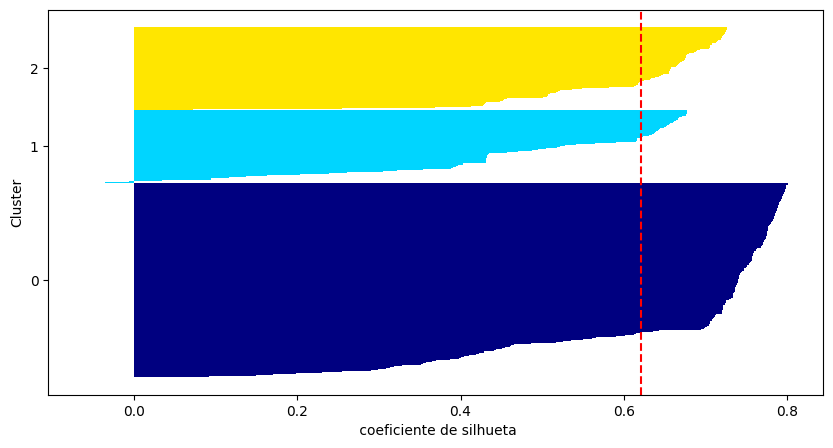

In [49]:
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

# Function to create silhouette plots for each cluster
def visualize_silhouette(df_editado, title):
    n_clusters = len(np.unique(df_pca['Cluster']))
    cluster_labels = df_pca['Cluster']
    silhouette_vals = silhouette_samples(df_pca.drop(columns=['Cluster']), cluster_labels)

    plt.figure(figsize=(10, 5))
    y_ax_lower, y_ax_upper = 0, 0
    yticks = []

    for i, c in enumerate(np.unique(cluster_labels)):
        c_silhouette_vals = silhouette_vals[cluster_labels == c]
        c_silhouette_vals.sort()
        y_ax_upper += len(c_silhouette_vals)
        color = cm.jet(i / n_clusters)
        plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)

        yticks.append((y_ax_lower + y_ax_upper) / 2)
        y_ax_lower += len(c_silhouette_vals)

    silhouette_avg = np.mean(silhouette_vals)
    plt.axvline(silhouette_avg, color="red", linestyle="--")

    plt.yticks(yticks, np.unique(cluster_labels))
    plt.ylabel('Cluster')
    plt.xlabel(' coeficiente de silhueta')
    # plt.title(f'Silhouette Plot for {title}')
    plt.show()

visualize_silhouette(df_editado, 'Visualization')

In [50]:
df['Cluster'] = df_pca['Cluster']

In [51]:
categorical_columns = ['Marital status', 'Age Group', 'Father\'s qualification', 'Mother\'s qualification', 'Debtor', 'Scholarship holder','GDP', 'Inflation rate',  'Unemployment rate']

# Criar uma tabela de frequência para cada variável por cluster
for column in categorical_columns:
    print(f"\nDistribuição de '{column}' por Cluster:")
    print(df.groupby(['Cluster', column]).size().unstack(fill_value=0))
    print("\n")


Distribuição de 'Marital status' por Cluster:
Marital status     1    2   3   4
Cluster                          
0               2422   18   7   6
1                480  347  24  79
2               1017   14   4   6



Distribuição de 'Age Group' por Cluster:
Age Group     0    1    2   3   4  5
Cluster                             
0          2256  159   29   9   0  0
1           208  412  221  76  12  1
2          1009   23    6   3   0  0



Distribuição de 'Father's qualification' por Cluster:
Father's qualification   0    1   2    3    19  34   37   38
Cluster                                                     
0                       134  682  58  245  632  41  254  407
1                        29   29   5   14   64  65  671   53
2                        16  193   5   23  272   6  284  242



Distribuição de 'Mother's qualification' por Cluster:
Mother's qualification   0    1   2    3   4    19  34   37   38
Cluster                                                         
0    

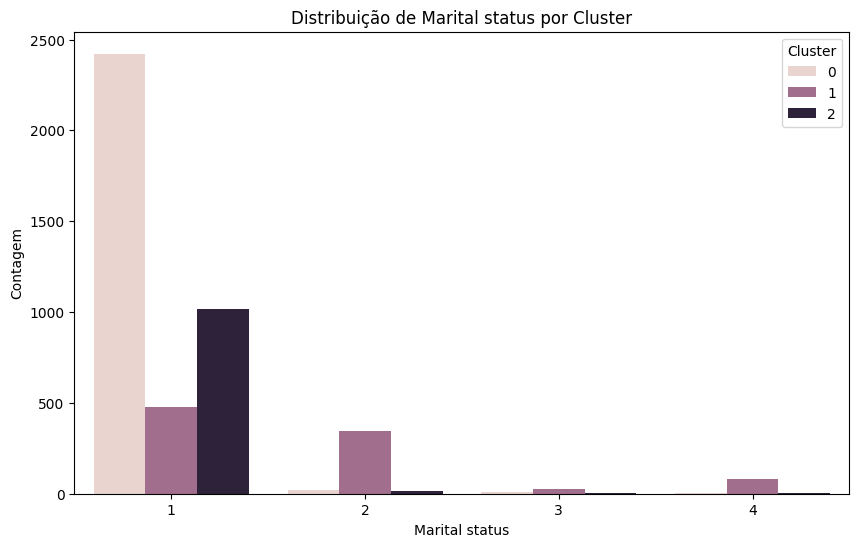

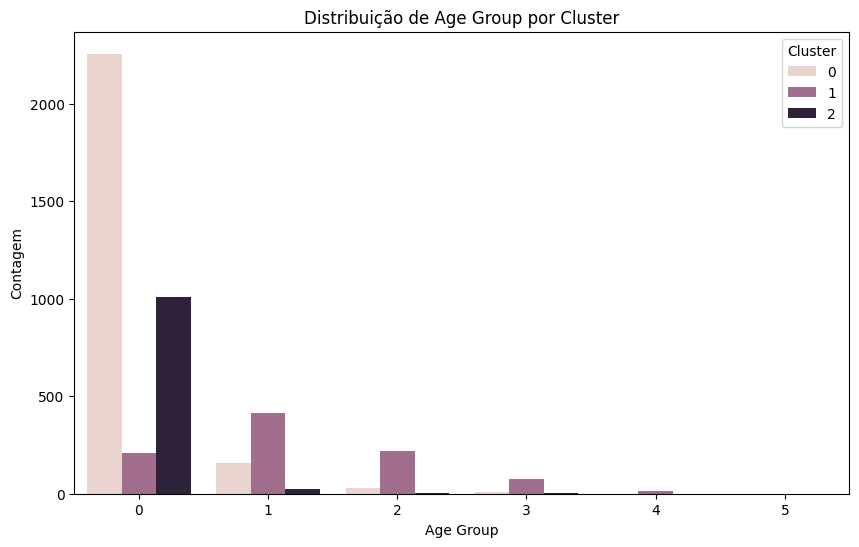

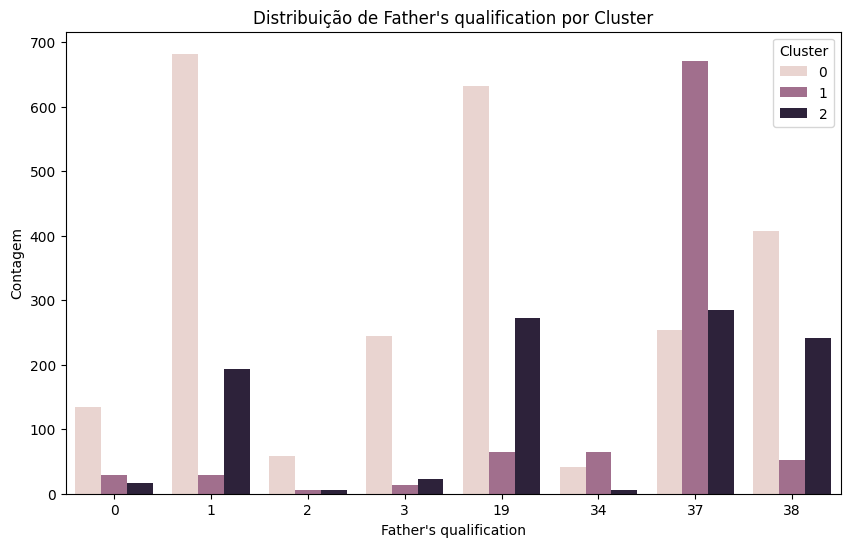

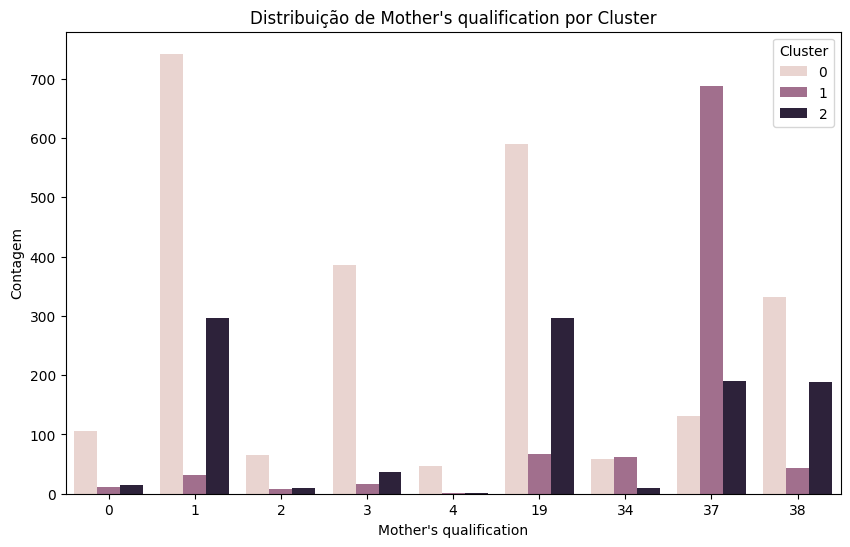

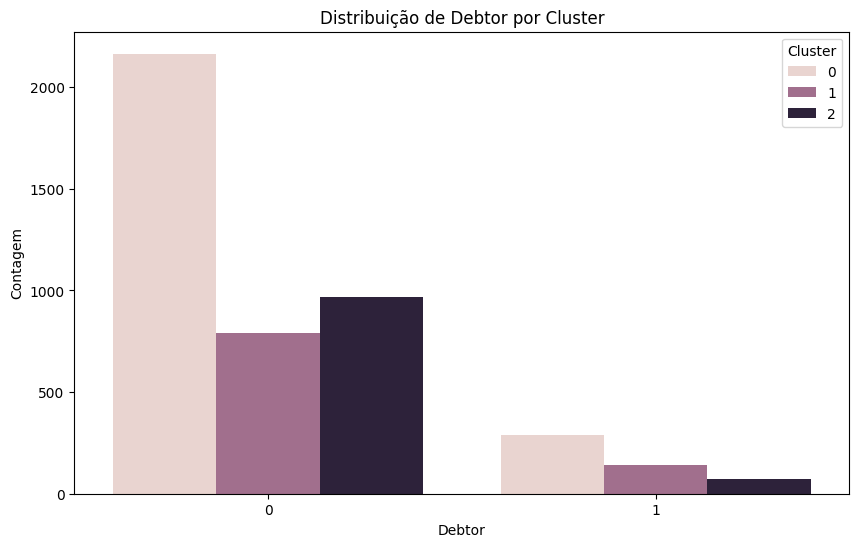

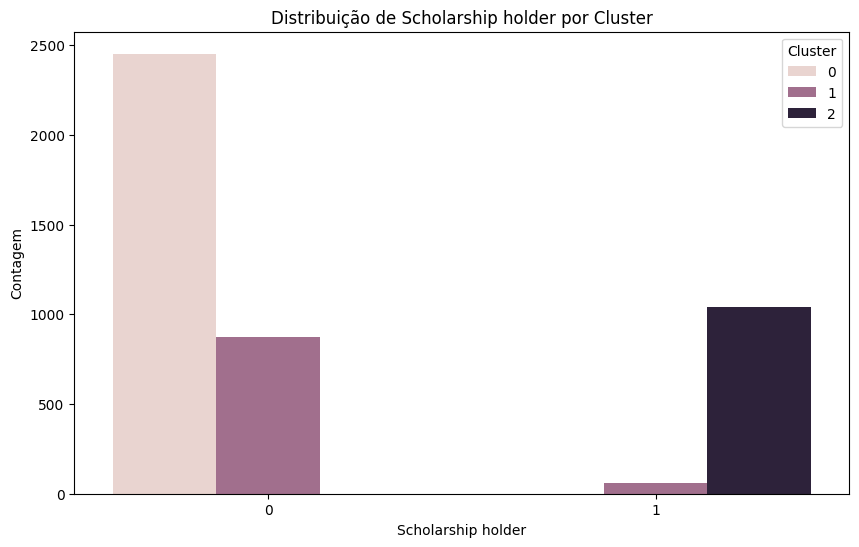

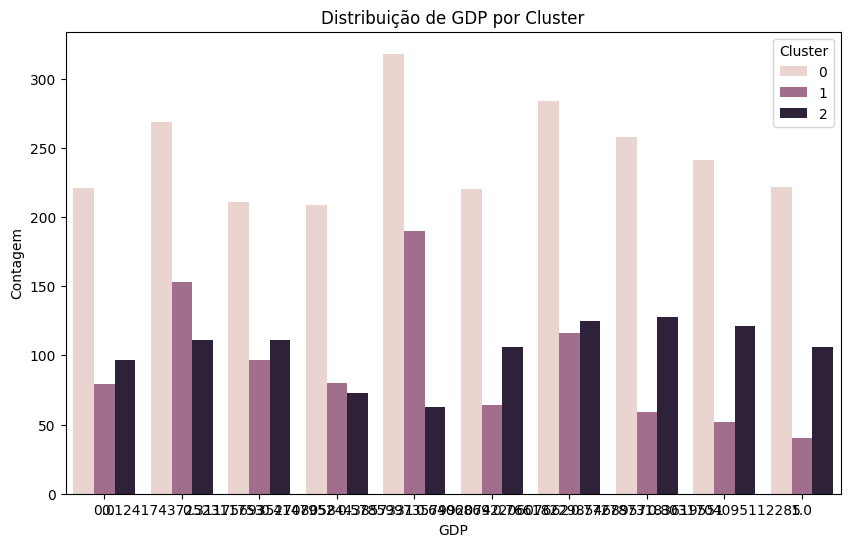

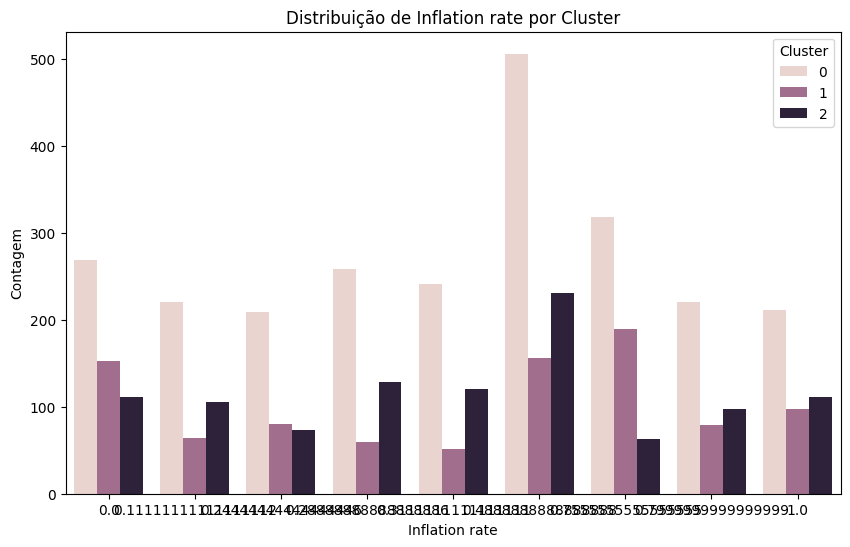

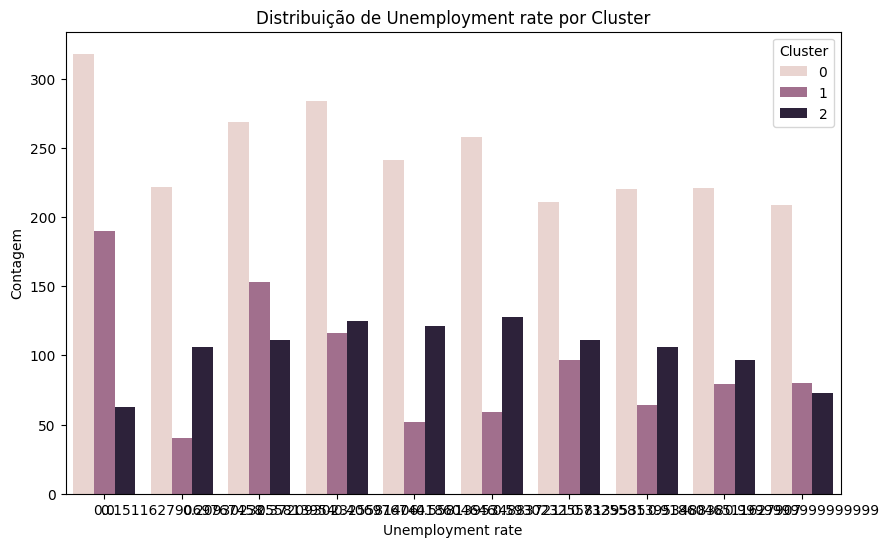

In [52]:
# Gerar gráficos de barras para cada variável categórica
for column in categorical_columns:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=column, hue='Cluster', data=df)
    plt.title(f'Distribuição de {column} por Cluster')
    plt.xlabel(column)
    plt.ylabel('Contagem')
    plt.legend(title='Cluster')
    plt.show()